<a href="https://colab.research.google.com/github/brinda-lax/DataAnalytics/blob/main/paraOlympicsparisforIndian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
Atheletes=pd.read_csv('/content/sample_data/athletes.csv')


#Indian seggregating data

In [3]:
#Indian=Atheletes[Atheletes['country']=='India']
#Indian.to_csv('Indian.csv')

#Indian Atheletes Data

In [4]:
Indian=pd.read_csv('/content/sample_data/Indian.csv')
Indian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          84 non-null     int64  
 1   code                84 non-null     int64  
 2   name                84 non-null     object 
 3   name_short          84 non-null     object 
 4   name_tv             84 non-null     object 
 5   gender              84 non-null     object 
 6   function            84 non-null     object 
 7   country_code        84 non-null     object 
 8   country             84 non-null     object 
 9   country_long        84 non-null     object 
 10  nationality         84 non-null     object 
 11  nationality_long    84 non-null     object 
 12  nationality_code    84 non-null     object 
 13  height              84 non-null     int64  
 14  weight              84 non-null     float64
 15  disciplines         84 non-null     object 
 16  events    

#Eliminating null and checking if any

In [5]:
Indian.fillna(0,inplace=True)
Indian.isna()
Indian.isnull().sum()
Indian.isnull().values.any()

False

In [6]:
Indian.reset_index(inplace=True)
#Indian.head()
Indian.drop('index',axis=1,inplace=True)
#print(Indian.columns)
Indian.drop('Unnamed: 0',axis=1,inplace=True)
Indian.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1989522,PAL Preethi,PAL P,Preethi PAL,Female,Athlete,IND,India,India,India,...,0,"English, Hindi",Gajendra Singh,"""I was interested due to the enjoyment I felt ...","Coach Gajendra Singh, Indian Para athletics Si...",Her family and Indian Para athletics competito...,"""I believe change is the only constant thing, ...",0,0,0
1,1989636,JEEVANJI Deepthi,JEEVANJI D,Deepthi JEEVANJI,Female,Athlete,IND,India,India,India,...,0,English,N Ramesh,She was spotted competing in a state-level ath...,0,0,"""If you believe in yourself and have dedicatio...",0,0,0
2,1989866,SUMIT,SUMIT,SUMIT,Male,Athlete,IND,India,India,India,...,0,"English, Hindi",Arun Kumar,"He competed in non-Para wrestling until 2015, ...",Indian freestyle wrestler Yogeshwar Dutt. (oly...,Coach Virender Dhankhar. (Sports Authority of ...,"""Success doesn't happen overnight. Keep your e...",0,0,He has competed in non-Para javelin at nationa...
3,1989938,SARGAR Sandip Sanjay,SARGAR SS,Sandip Sanjay SARGAR,Male,Athlete,IND,India,India,India,...,0,0,0,0,0,0,0,0,0,0
4,1989988,AJEET SINGH,AJEET SINGH,AJEET SINGH,Male,Athlete,IND,India,India,India,...,0,"English, Hindi",0,"""During recuperation and my inner turmoil I wa...",0,0,"""To me, pain is like jewellery on an athlete. ...",0,0,0


In [7]:
print(Indian.columns)

Index(['code', 'name', 'name_short', 'name_tv', 'gender', 'function',
       'country_code', 'country', 'country_long', 'nationality',
       'nationality_long', 'nationality_code', 'height', 'weight',
       'disciplines', 'events', 'birth_date', 'birth_place', 'birth_country',
       'residence_place', 'residence_country', 'nickname', 'hobbies',
       'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero',
       'influence', 'philosophy', 'sporting_relatives', 'ritual',
       'other_sports'],
      dtype='object')


In [8]:
Indian_atheletes=Indian[['name','gender','lang','residence_place','disciplines','coach','occupation','education']]
Indian_atheletes

,name,gender,lang,residence_place,disciplines,coach,occupation,education
0,PAL Preethi,Female,"English, Hindi",MUZAFFARNAGAR,['Para Athletics'],Gajendra Singh,Athlete,Forestry Studies - Chaudhary Charan Singh Univ...
1,JEEVANJI Deepthi,Female,English,HYDERABAD,['Para Athletics'],N Ramesh,Athlete,0
2,SUMIT,Male,"English, Hindi",SONIPAT,['Para Athletics'],Arun Kumar,Athlete,"Commerce - Ramjas College, New Delhi, IND"
3,SARGAR Sandip Sanjay,Male,0,0,['Para Athletics'],0,0,0
4,AJEET SINGH,Male,"English, Hindi",GWALIOR,['Para Athletics'],0,Athlete,Lakshmibai National Institute of Physical Educ...
...,...,...,...,...,...,...,...,...
79,RAM PAL,Male,"English, Hindi",0,['Para Athletics'],0,"Athlete, Public Servant","Maharshi Dayanand University, Rohtak, IND"
80,DHARAMBIR,Male,Hindi,SONIPAT,['Para Athletics'],"Amit Saroha [personal], IND",0,"Maheshwari Dayanand University, Rohtak, IND"
81,KUMAR Amit Kumar,Male,"English, Hindi",SONIPAT,['Para Athletics'],0,Athlete,"Maharshi Dayanand University, Rohtak, IND"
82,CHAUDHARY Bhavanaben Ajabaji,Female,Hindi,0,['Para Athletics'],Sunil Tanwer,Student,"Kalinga University, Chhattisgarh, IND"


#Gender based Participation From India

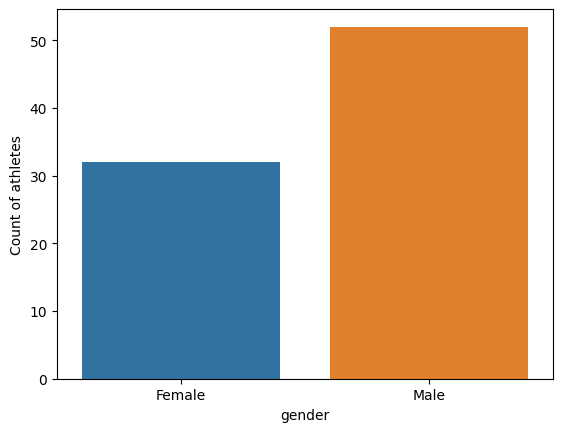

In [9]:
IndianGenderParticipation=Indian_atheletes.groupby('gender')['name'].count()
IndianGenderParticipation = IndianGenderParticipation.to_frame(name='Count of athletes')
IndianGenderParticipation.reset_index(inplace=True)
IndianGenderParticipation
sns.barplot(x='gender',y='Count of athletes',hue='gender',data=IndianGenderParticipation)
plt.show()

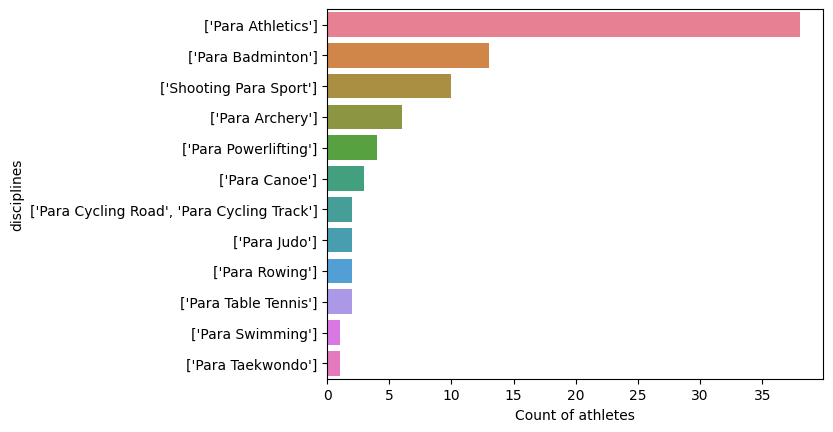

In [10]:
IndianAtheletesSport=Indian_atheletes.groupby('disciplines').size().sort_values(ascending=False)
#IndianAtheletesSport.reset_index(inplace=True)
IndianAtheletesSport = IndianAtheletesSport.to_frame(name='Count of athletes')
IndianAtheletesSport.reset_index(inplace=True)
#IndianAtheletesSport.rename(columns={0:'Count of athletes'},inplace=True)
IndianAtheletesSport
sns.barplot(y='disciplines',x='Count of athletes',hue='disciplines',data=IndianAtheletesSport)
plt.show()


#Reading Medals count

Index(['medal_date', 'medal_type', 'medal_code', 'name', 'gender',
       'country_code', 'country', 'country_long', 'nationality_code',
       'nationality', 'nationality_long', 'team', 'team_gender', 'discipline',
       'event', 'event_type', 'url_event', 'birth_date', 'code_athlete',
       'code_team'],
      dtype='object')


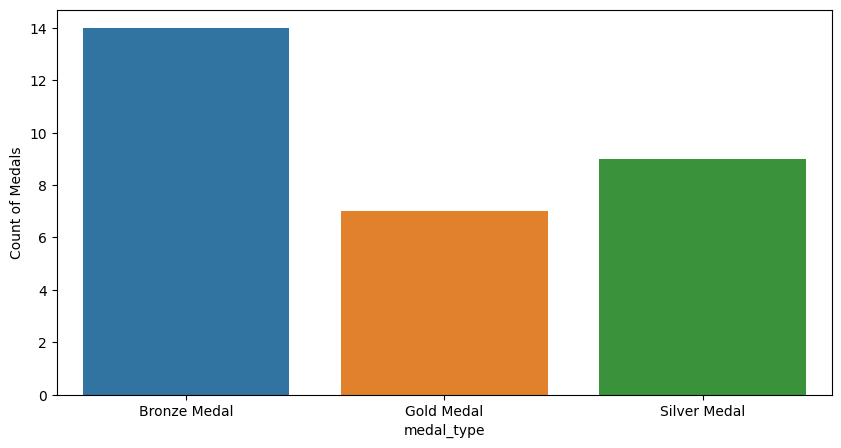

In [12]:
Medals=pd.read_csv('/content/sample_data/medallists.csv')
#Medals.head()
print(Medals.columns)
#Medals
Medals_Indian=Medals[Medals['country_code']=='IND'].copy()

Medals_Indian.sort_values(by='medal_code',ascending=True,inplace=True)
Medals_Indian.reset_index(drop='True',inplace=True)

MedalCount=Medals_Indian.groupby('medal_type').size()
MedalCount=MedalCount.to_frame(name='Count of Medals')
MedalCount.reset_index(inplace=True)
plt.figure(figsize=(10,5))
sns.barplot(x='medal_type',y='Count of Medals',hue='medal_type',data=MedalCount)
plt.show()
#Medals_Indian.drop('index',axis=1,inplace=True)
#Medals_Indian.to_csv('IndianMedals.csv')

#In Terms of piechart


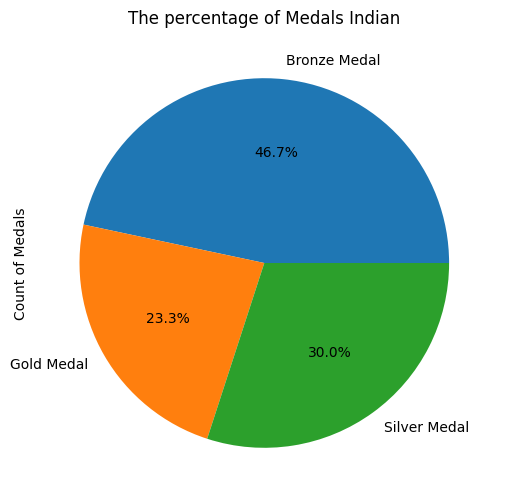

In [13]:
MedalCount.plot(kind='pie',
                y='Count of Medals',  # The values to be plotted
                labels=MedalCount['medal_type'],  # The labels (medal types)
                autopct='%1.1f%%',  # Show percentages
                figsize=(8, 6),
                legend=False)
plt.title('The percentage of Medals Indian')

# Show the plot
plt.show()


In [14]:
Medals_Indian.fillna(0,inplace=True)
#Medals_Indian.isna()
#Medals_Indian.isnull().sum()
Medals_Indian.isnull().values.any()

False

In [15]:
Medals_Indian.head()

,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality_code,nationality,nationality_long,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team
0,2024-09-02,Gold Medal,1,NITESH Kumar,Male,IND,India,India,IND,India,India,0,0,Para Badminton,Men's Singles SL3,HATH,/en/paris-2024-paralympics/results/para-badmin...,1994-12-30,2499521.0,0
1,2024-09-06,Gold Medal,1,PRAVEEN KUMAR,Male,IND,India,India,IND,India,India,0,0,Para Athletics,Men's High Jump - T64,ATH,/en/paris-2024-paralympics/results/para-athlet...,2003-05-15,1990249.0,0
2,2024-09-04,Gold Medal,1,DHARAMBIR,Male,IND,India,India,IND,India,India,0,0,Para Athletics,Men's Club Throw - F51,ATH,/en/paris-2024-paralympics/results/para-athlet...,1989-01-18,3415803.0,0
3,2024-09-02,Gold Medal,1,SUMIT,Male,IND,India,India,IND,India,India,0,0,Para Athletics,Men's Javelin Throw - F64,ATH,/en/paris-2024-paralympics/results/para-athlet...,1998-06-07,1989866.0,0
4,2024-09-04,Gold Medal,1,SINGH Harvinder,Male,IND,India,India,IND,India,India,0,0,Para Archery,Men's Individual Recurve Open,HATH,/en/paris-2024-paralympics/results/para-archer...,1991-02-25,2488318.0,0


#Count of Athletes who won medals genderwise

In [32]:
atheletes_genderwise=Medals_Indian.groupby('gender')['medal_code'].count().reset_index(name='Count_of_Athletes')
atheletes_genderwise

,gender,Count_of_Athletes
0,Female,11
1,Male,19


#catplot for number of atheletes won genderwise

<Figure size 500x500 with 0 Axes>

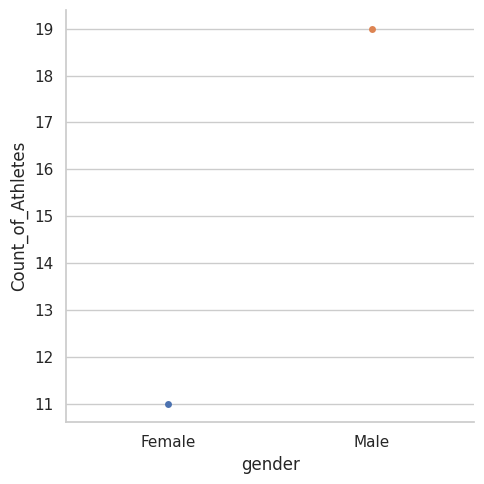

In [46]:
plt.figure(figsize=(5,5))
sns.set(style = 'whitegrid')
sns.catplot(x='gender',y='Count_of_Athletes',hue='gender',data=atheletes_genderwise)
plt.show()

#Forecast of atheletes winning medals

In [62]:
growth_rate=atheletes_genderwise['Count_of_Athletes'].pct_change().iloc[-1]
growth_rate
forecast_female = atheletes_genderwise.loc[atheletes_genderwise['gender'] == 'Female', 'Count_of_Athletes'].values[0] * (1 + growth_rate)
forecast_male = atheletes_genderwise.loc[atheletes_genderwise['gender'] == 'Male', 'Count_of_Athletes'].values[0] * (1 + growth_rate)
#print("Forecast for Female:", round(forecast_female))
#print("Forecast for Male:", round(forecast_male))
forecast_df = pd.DataFrame({
    'gender': ['Female', 'Male'],
    'Forecast_Count_of_Athletes': [round(forecast_female), round(forecast_male)]
})
forecast_df

,gender,Forecast_Count_of_Athletes
0,Female,19
1,Male,33


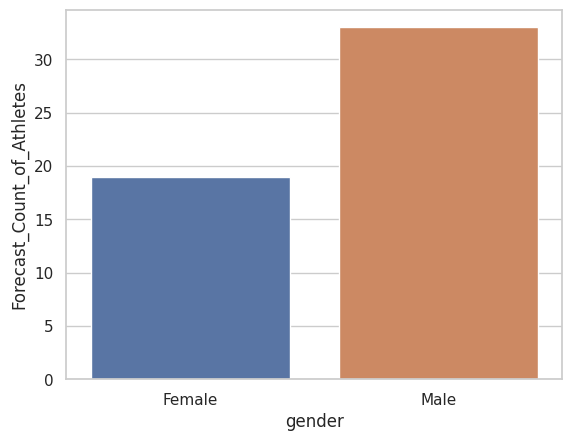

In [63]:
plt.figsize=(5,5)
sns.barplot(x='gender',y='Forecast_Count_of_Athletes',hue='gender',data=forecast_df)
plt.show()